In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

In [3]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | heilbad heiligenstadt
Processing Record 4 of Set 1 | kas
Processing Record 5 of Set 1 | taoudenni
Processing Record 6 of Set 1 | tucuma
Processing Record 7 of Set 1 | nuuk
Processing Record 8 of Set 1 | jipijapa
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | lata
Processing Record 13 of Set 1 | tromso
Processing Record 14 of Set 1 | sipalay
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | vilyuchinsk
Processing Record 17 of Set 1 | nar'yan-mar
Processing Record 18 of Set 1 | boali
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | anina
Processing Record 21 of Set 1 | la passe
Processing Record 22 of Set 1 | olonkinbyen
Processing Record 23 of Set 1 | mary
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,50.56,55,62,12.01,CL,1698615687
1,san patricio,28.0170,-97.5169,89.55,58,64,11.48,US,1698615687
2,heilbad heiligenstadt,51.3833,10.1333,52.84,84,82,3.00,DE,1698615688
3,kas,36.2018,29.6377,71.38,67,100,3.47,TR,1698615688
4,taoudenni,22.6783,-3.9836,89.96,11,0,7.78,ML,1698615688


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,50.56,55,62,12.01,CL,1698615687
1,san patricio,28.0170,-97.5169,89.55,58,64,11.48,US,1698615687
2,heilbad heiligenstadt,51.3833,10.1333,52.84,84,82,3.00,DE,1698615688
3,kas,36.2018,29.6377,71.38,67,100,3.47,TR,1698615688
4,taoudenni,22.6783,-3.9836,89.96,11,0,7.78,ML,1698615688


The r-squared is: 0.359


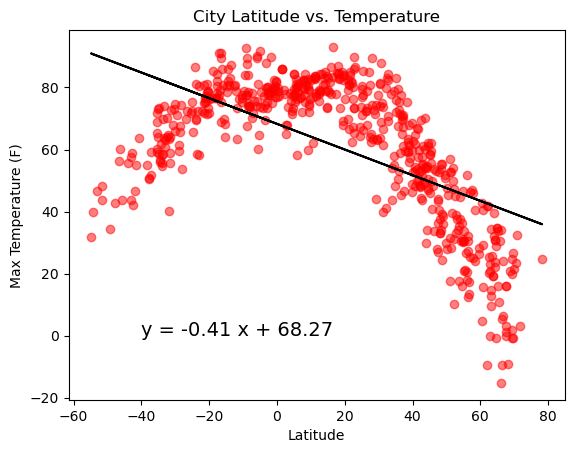

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, temp, marker="o", color="r", alpha = 0.5)
plt.plot(lat, regress_values, color='black')
plt.annotate(line_eq,(-40,0), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

The r-squared is: 0.02


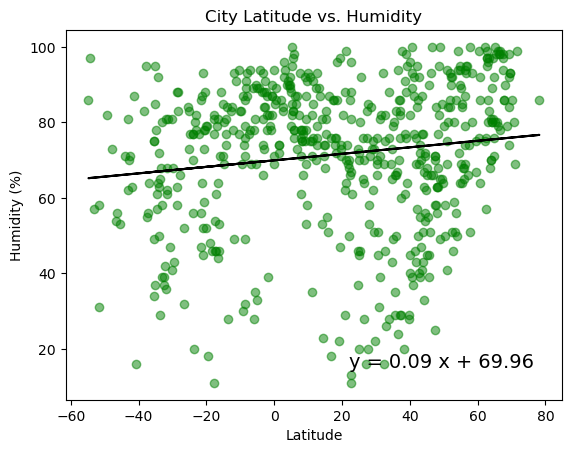

In [9]:
humidity = city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humidity)
regress_values = lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, humidity, marker="o", color="g", alpha = 0.5)
plt.plot(lat, regress_values, color='black')
plt.annotate(line_eq,(22,15), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

The r-squared is: 0.009


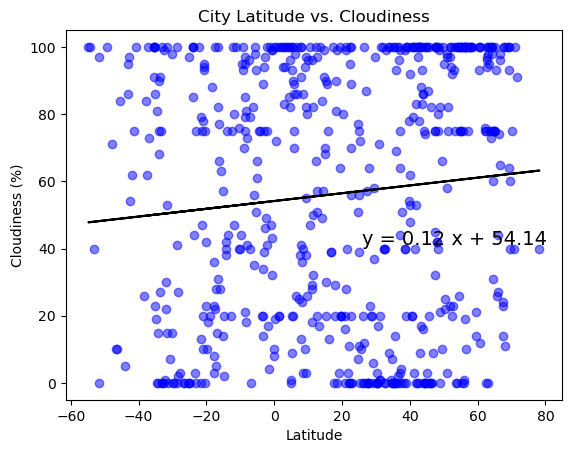

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(lat, cloudiness)
regress_values = lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, cloudiness, marker="o", color="b", alpha = 0.5)
plt.plot(lat, regress_values, color='black')
plt.annotate(line_eq,(26,41), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

The r-squared is: 0.04


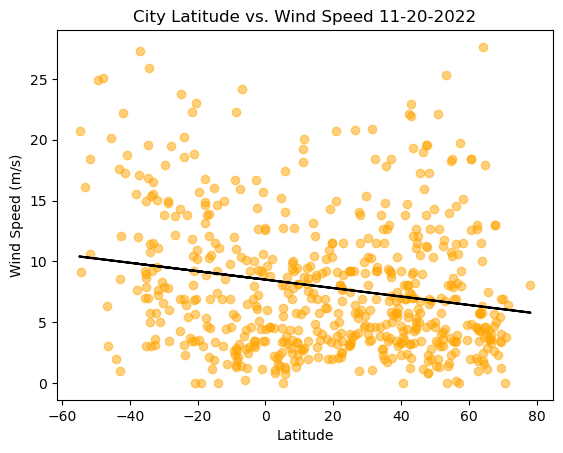

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(lat, wind_speed)
regress_values = lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, wind_speed, marker="o", color="orange", alpha = 0.5)
plt.plot(lat, regress_values, color='black')
plt.annotate(line_eq,(-40,30), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 11-20-2022")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

In [12]:
# Define a function to create Linear Regression plots
def lin_regress_plot(df, x, y, xlabel, ylabel):
    # linear Regression Equation
    d_slope, d_int, d_r, d_p, d_std_err = linregress(df[x], df[y])
    print(f"The r-value is: {d_r}")
    
    # plot figure and labels
    plt.scatter(df[x],df[y])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    d_line = d_slope * df[x] + d_int
    plt.plot(df[x], d_line, color = 'red')
    plt.text(round(df[x].min(),2), round(df[y].min(),2), f'$y ={round(d_slope, 2)}x + {round(d_int, 2)} $',
    color='red', fontsize=15)

    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san patricio,28.0170,-97.5169,89.55,58,64,11.48,US,1698615687
2,heilbad heiligenstadt,51.3833,10.1333,52.84,84,82,3.00,DE,1698615688
3,kas,36.2018,29.6377,71.38,67,100,3.47,TR,1698615688
4,taoudenni,22.6783,-3.9836,89.96,11,0,7.78,ML,1698615688
6,nuuk,64.1835,-51.7216,30.81,80,100,27.63,GL,1698615688


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,50.56,55,62,12.01,CL,1698615687
5,tucuma,-0.1833,-50.0500,81.64,71,10,12.77,BR,1698615688
7,jipijapa,-1.3333,-80.5833,75.13,79,100,4.45,EC,1698615689
8,hermanus,-34.4187,19.2345,56.48,64,0,25.88,ZA,1698615689
10,ushuaia,-54.8000,-68.3000,31.66,86,100,20.71,AR,1698615689


The r-value is: -0.869066576617099


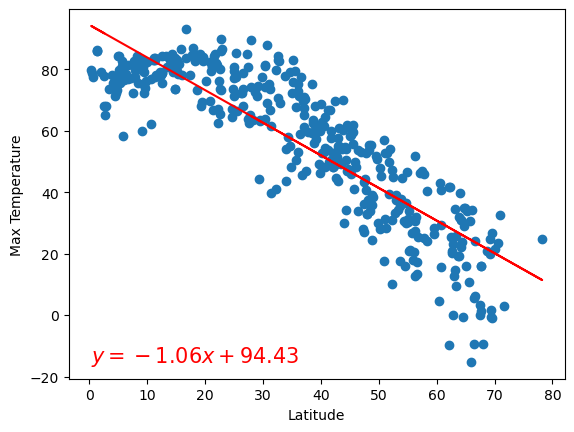

In [15]:
# Linear regression on Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temperature")

The r-value is: 0.7704268175185143


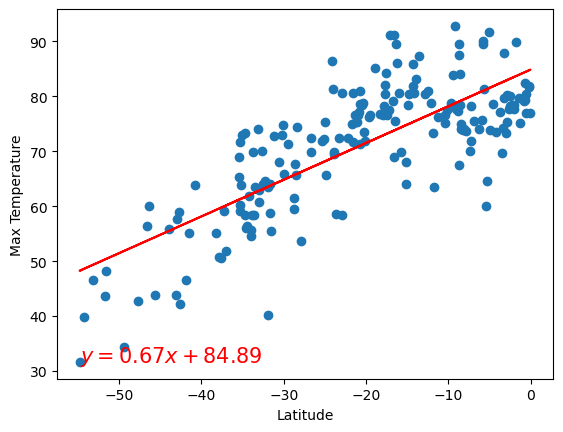

In [16]:
# Linear regression on Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temperature")

The r-value is: 0.07903937481789945


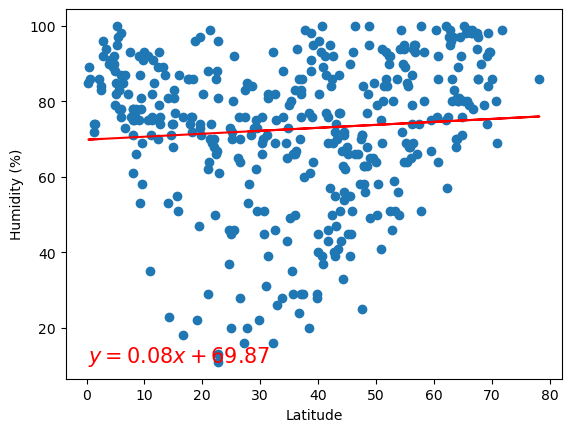

In [17]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity (%)")

The r-value is: 0.2566838616788277


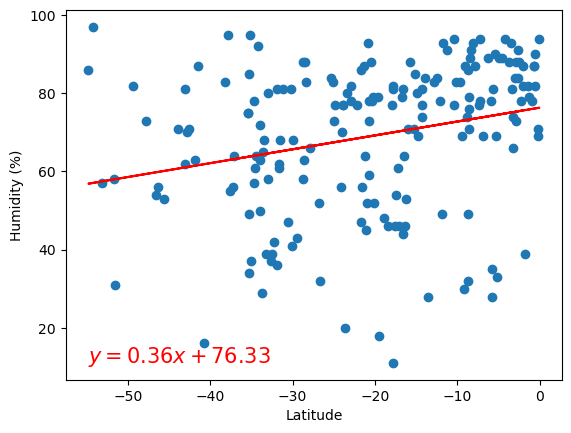

In [18]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity (%)")

The r-value is: 0.12384382736796364


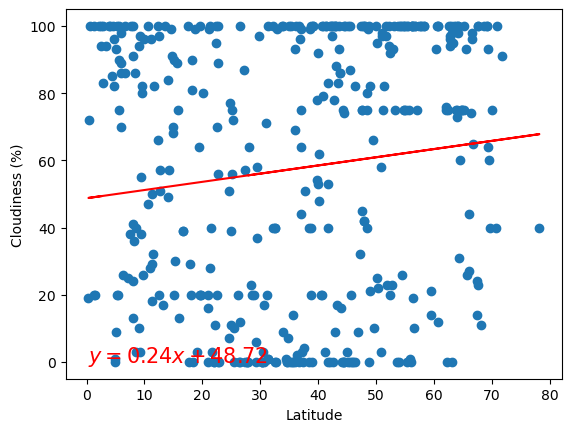

In [19]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness (%)")

The r-value is: 0.023369433646257647


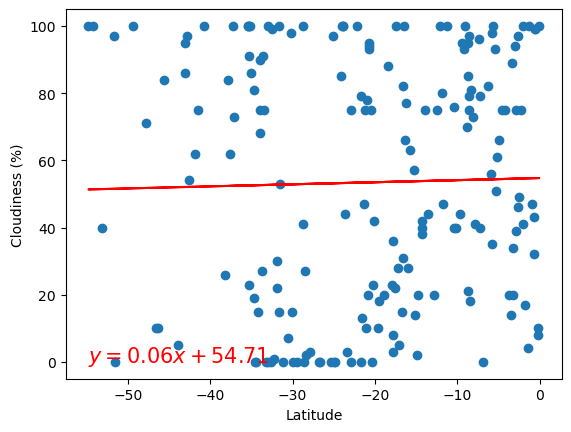

In [20]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness (%)")

The r-value is: 0.03291772435177154


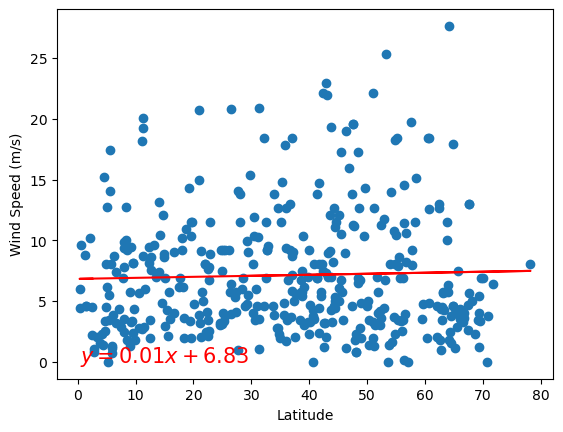

In [21]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Lat", "Wind Speed", "Latitude", "Wind Speed (m/s)")

The r-value is: -0.3449632865710314


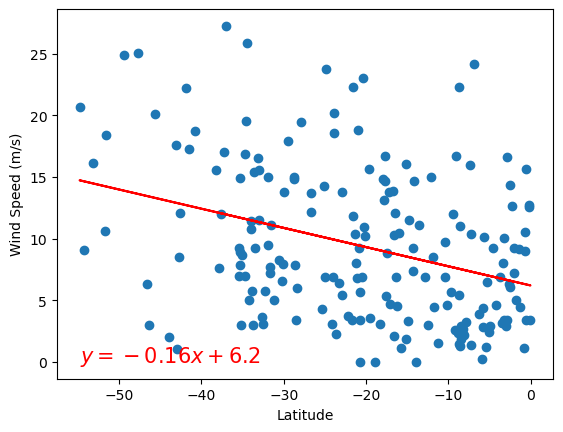

In [22]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Lat", "Wind Speed", "Latitude", "Wind Speed (m/s)")